In [ ]:
!pip install scikit-learn




In [ ]:
pip install tensorflow


In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers import Conv1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [ ]:
def review_to_wordlist( review, remove_stopwords=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [ ]:
data_file = "/content/Amazon_Unlocked_Mobile.csv"

n = 413000
s = 20000
skip = sorted(random.sample(range(1,n),n-s))


data = pd.read_csv( data_file, delimiter = ",", skiprows = skip)

In [ ]:
data.shape

(3422, 6)

In [ ]:
data = data[data['Reviews'].isnull()==False]

In [ ]:
train, test = train_test_split(data, test_size = 0.3)

<Axes: ylabel='count'>

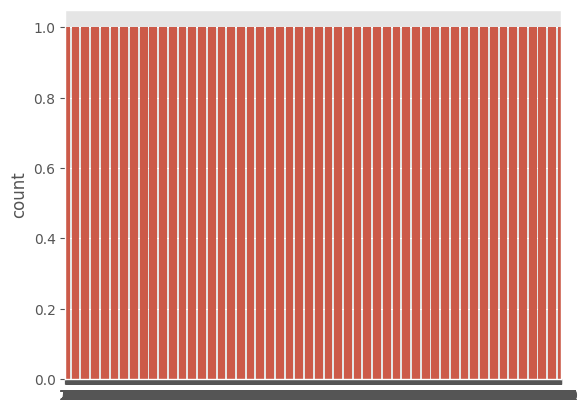

In [ ]:
sns.countplot(data['Rating'])

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

# Add your review_to_wordlist function here

clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append(" ".join(review_to_wordlist(review)))

clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append(" ".join(review_to_wordlist(review)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-39-b3b0cd9db809>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review).get_text()


In [ ]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming you have already loaded your train_features and test_features

# Make sure to set k to a valid value, e.g., k='all' to return all features
fselect = SelectKBest(chi2, k='all')

# Fit and transform the train features
train_features_selected = fselect.fit_transform(train_features, train["Rating"])

# Transform the test features using the same selection
test_features_selected = fselect.transform(test_features)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming you have already loaded your train_features and test_features

model1 = MultinomialNB(alpha=0.001)
model1.fit(train_features, train["Rating"])

model2 = SGDClassifier(loss='modified_huber', max_iter=5, random_state=0, shuffle=True)
model2.fit(train_features, train["Rating"])

model3 = RandomForestClassifier()
model3.fit(train_features, train["Rating"])

model4 = GradientBoostingClassifier()
model4.fit(train_features, train["Rating"])

# Assuming you have already loaded your test_features

pred_1 = model1.predict(test_features.toarray())
pred_2 = model2.predict(test_features.toarray())
pred_3 = model3.predict(test_features.toarray())
pred_4 = model4.predict(test_features.toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
class NBSVM(six.with_metaclass(ABCMeta, BaseEstimator, ClassifierMixin)):

    def __init__(self, alpha=1.0, C=1.0, max_iter=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.C = C
        self.svm_ = [] # fuggly

    def fit(self, X, y):
        X, y = check_X_y(X, y, 'csr')
        _, n_features = X.shape

        labelbin = LabelBinarizer()
        Y = labelbin.fit_transform(y)
        self.classes_ = labelbin.classes_
        if Y.shape[1] == 1:
            Y = np.concatenate((1 - Y, Y), axis=1)

        # LabelBinarizer().fit_transform() returns arrays with dtype=np.int64.
        # so we don't have to cast X to floating point
        Y = Y.astype(np.float64)

        # Count raw events from data
        n_effective_classes = Y.shape[1]
        self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
        self.ratios_ = np.full((n_effective_classes, n_features), self.alpha,
                                 dtype=np.float64)
        self._compute_ratios(X, Y)

        # flugglyness
        for i in range(n_effective_classes):
            X_i = X.multiply(self.ratios_[i])
            svm = LinearSVC(C=self.C, max_iter=self.max_iter)
            Y_i = Y[:,i]
            svm.fit(X_i, Y_i)
            self.svm_.append(svm)

        return self

    def predict(self, X):
        n_effective_classes = self.class_count_.shape[0]
        n_examples = X.shape[0]

        D = np.zeros((n_effective_classes, n_examples))

        for i in range(n_effective_classes):
            X_i = X.multiply(self.ratios_[i])
            D[i] = self.svm_[i].decision_function(X_i)

        return self.classes_[np.argmax(D, axis=0)]

    def _compute_ratios(self, X, Y):
        """Count feature occurrences and compute ratios."""
        if np.any((X.data if issparse(X) else X) < 0):
            raise ValueError("Input X must be non-negative")

        self.ratios_ += safe_sparse_dot(Y.T, X)  # ratio + feature_occurrance_c
        normalize(self.ratios_, norm='l1', axis=1, copy=False)
        row_calc = lambda r: np.log(np.divide(r, (1 - r)))
        self.ratios_ = np.apply_along_axis(row_calc, axis=1, arr=self.ratios_)
        check_array(self.ratios_)
        self.ratios_ = sparse.csr_matrix(self.ratios_)

        #p_c /= np.linalg.norm(p_c, ord=1)
        #ratios[c] = np.log(p_c / (1 - p_c))


def f1_class(pred, truth, class_val):
    n = len(truth)

    truth_class = 0
    pred_class = 0
    tp = 0

    for ii in range(0, n):
        if truth[ii] == class_val:
            truth_class += 1
            if truth[ii] == pred[ii]:
                tp += 1
                pred_class += 1
                continue;
        if pred[ii] == class_val:
            pred_class += 1

    precision = tp / float(pred_class)
    recall = tp / float(truth_class)

    return (2.0 * precision * recall) / (precision + recall)


def semeval_senti_f1(pred, truth, pos=2, neg=0):

    f1_pos = f1_class(pred, truth, pos)
    f1_neg = f1_class(pred, truth, neg)

    return (f1_pos + f1_neg) / 2.0;


def main(train_file, test_file, ngram=(1, 3)):
    print('loading...')
    train = pd.read_csv(train_file, delimiter='\t', encoding='utf-8', header=0,
                        names=['text', 'label'])

    # to shuffle:
    #train.iloc[np.random.permutation(len(df))]

    test = pd.read_csv(test_file, delimiter='\t', encoding='utf-8', header=0,
                        names=['text', 'label'])

    print('vectorizing...')
    vect = CountVectorizer()
    classifier = NBSVM()

    # create pipeline
    clf = Pipeline([('vect', vect), ('nbsvm', classifier)])
    params = {
        'vect__token_pattern': r"\S+",
        'vect__ngram_range': ngram,
        'vect__binary': True
    }
    clf.set_params(**params)

    #X_train = vect.fit_transform(train['text'])
    #X_test = vect.transform(test['text'])

    print('fitting...')
    clf.fit(train['text'], train['label'])

    print('classifying...')
    pred = clf.predict(test['text'])

    print('testing...')
    acc = accuracy_score(test['label'], pred)
    f1 = semeval_senti_f1(pred, test['label'])
    print('NBSVM: acc=%f, f1=%f' % (acc, f1))


In [ ]:
model5 = NBSVM(C=0.01)
model5.fit( train_features, train["Rating"] )

pred_5 = model5.predict( test_features )

In [ ]:
print(classification_report(test['Rating'], pred_2, target_names=['1','2','3','4','5']))

              precision    recall  f1-score   support

           1       0.71      0.72      0.72       199
           2       0.22      0.14      0.17        35
           3       0.30      0.19      0.23        43
           4       0.30      0.25      0.27       112
           5       0.83      0.89      0.86       638

    accuracy                           0.73      1027
   macro avg       0.47      0.44      0.45      1027
weighted avg       0.71      0.73      0.72      1027



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test['Rating'], pred_5)


Confusion matrix, without normalization
[[167   3   3   2  24]
 [ 20   4   1   2   8]
 [ 17   0   5   1  20]
 [ 11   0   2  19  80]
 [ 13   1   4  13 607]]


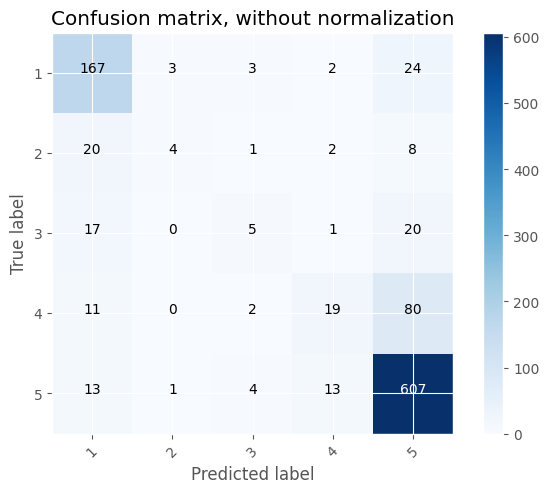

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix, without normalization')

In [ ]:
print('prediction 1 accuracy: ', accuracy_score(test['Rating'], pred_1))
print('prediction 2 accuracy: ', accuracy_score(test['Rating'], pred_2))
print('prediction 3 accuracy: ', accuracy_score(test['Rating'], pred_3))
print('prediction 4 accuracy: ', accuracy_score(test['Rating'], pred_4))
print('prediction 5 accuracy: ', accuracy_score(test['Rating'], pred_5))

prediction 1 accuracy:  0.7663096397273612
prediction 2 accuracy:  0.7341772151898734
prediction 3 accuracy:  0.7663096397273612
prediction 4 accuracy:  0.7429406037000974
prediction 5 accuracy:  0.7809152872444012


In [ ]:
batch_size = 32
nb_classes = 5

In [ ]:
from keras.utils import to_categorical
import numpy as np

In [ ]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 1000, ngram_range = ( 1, 3 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [ ]:
from keras.utils import to_categorical
import numpy as np

# Assuming you have already loaded your train_features and test_features

X_train = train_features.toarray()
X_test = test_features.toarray()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(train['Rating'] - 1)
y_test = np.array(test['Rating'] - 1)


Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# pre-processing: divide by max and subtract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical crossentropy for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_train, Y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

print("Generating test predictions...")
preds = model.predict(X_test, verbose=0)
predicted_classes = np.argmax(preds, axis=1)


X_train shape: (2394, 1000)
X_test shape: (1027, 1000)
Training...
Epoch 1/5
135/135 [==============================] - 3s 13ms/step - loss: 1.0962 - val_loss: 0.8187
Epoch 2/5
135/135 [==============================] - 2s 12ms/step - loss: 0.8046 - val_loss: 0.7041
Epoch 3/5
135/135 [==============================] - 2s 13ms/step - loss: 0.6957 - val_loss: 0.6996
Epoch 4/5
135/135 [==============================] - 1s 10ms/step - loss: 0.6274 - val_loss: 0.7314
Epoch 5/5
135/135 [==============================] - 1s 10ms/step - loss: 0.5635 - val_loss: 0.7346
Generating test predictions...


In [ ]:
print('prediction 6 accuracy: ', accuracy_score(test['Rating'], np.argmax(preds, axis=1)+1))


prediction 6 accuracy:  0.7487828627069133


In [ ]:
max_features = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
maxlen = 80
batch_size = 32
nb_classes = 5


In [ ]:
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(train['Reviews'])
sequences_train = tokenizer.texts_to_sequences(train['Reviews'])
sequences_test = tokenizer.texts_to_sequences(test['Reviews'])

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (2394, 80)
X_test shape: (1027, 80)


In [ ]:
from keras.layers import SpatialDropout1D

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=1,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)
predicted_classes = np.argmax(preds, axis=1)


Build model...
Train...
33/33 [==============================] - 2s 54ms/step - loss: 0.3428 - accuracy: 0.6251
Test score: 0.34281373023986816
Test accuracy: 0.6251217126846313
Generating test predictions...


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
max_features = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
maxlen = 80
batch_size = 32
nb_classes = 5

In [ ]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(train['Reviews'])
sequences_train = tokenizer.texts_to_sequences(train['Reviews'])
sequences_test = tokenizer.texts_to_sequences(test['Reviews'])

In [ ]:

from keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)



print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (2394, 80)
X_test shape: (1027, 80)


In [ ]:
from keras.layers import LSTM
import numpy as np

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=1,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test), axis=-1)


Build model...
Train...
33/33 [==============================] - 2s 61ms/step - loss: 0.3520 - accuracy: 0.6212
Test score: 0.3520367443561554
Test accuracy: 0.6212268471717834
Generating test predictions...
33/33 [==============================] - 2s 48ms/step


75/75 [==============================] - 24s 319ms/step - loss: 0.3290 - accuracy: 0.6571 - val_loss: 0.2829 - val_accuracy: 0.7147


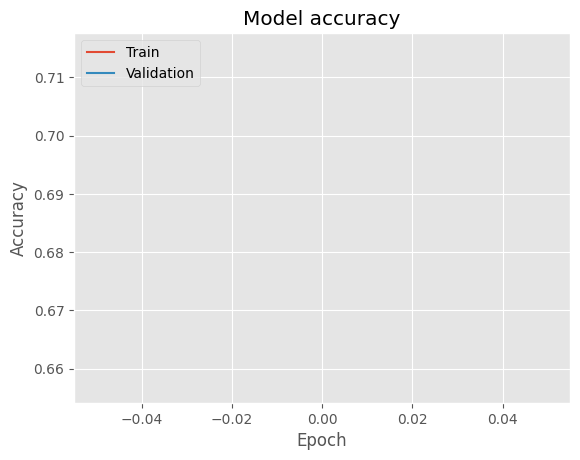

In [ ]:
import matplotlib.pyplot as plt

# Train the model and collect the history
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=1,
                    validation_data=(X_test, Y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
